# Hominid dataset analysis

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [44]:
#read data
hominid = pd.read_csv("Homininos_DataSet (1).csv")
print(hominid.keys())

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')


In [7]:
hominid.Time.describe()


count           720
unique           24
top       4.2- 3.9 
freq             30
Name: Time, dtype: object

The column 'Time' is crucial for my analyses but the formatting is not consistent among all data points and cannot be interpreted as an ordered categorical variable. In the following lines I develop a loop in which I

1.Go through each row

2.Check if the line contains a '-'

3.If the line contains a '-', split the line and keep only the first number

4.Check if the number contains a 'ma'

5.If the number contains a 'ma', keep only the first character

6.If the number doesn't contain a 'ma', keep only the first chacter and add a '0.' before it

The previous part of the loop ensures I only keep the oldest known appearance of the species, expressed as million years ago, and converts the ones expressed in thousand years ago to million years ago.


In [19]:
#Converting Time into Oldest known record (mya)

h_time = hominid['Time']
mya_time = []

for item in h_time:
    if '-' in item:
        x = item.split('-')
        if 'ma' in x[0]:
            mya_time.append(float(x[0][0]))
        elif '.' in x[0]:
            mya_time.append(float(x[0]))
        else:
            mya_time.append(float('0.' + x[0]))
    else:
        mya_time.append(float(item))
        
#print(mya_time)
hominid['mya_time'] = mya_time

#print(hominid.head())
hominid.mya_time.describe()

count    720.000000
mean       2.355417
std        1.767004
min        0.100000
25%        0.900000
50%        2.100000
75%        3.500000
max        7.000000
Name: mya_time, dtype: float64

Objective 1: Is hominid cranial capacity correlated with variables related to diet (Incisor Size, Jaw Shape, Canine Size, Canines Shape, Tooth Enamel, Diet)?

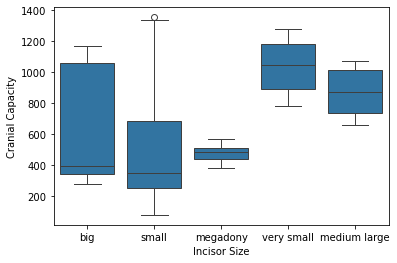

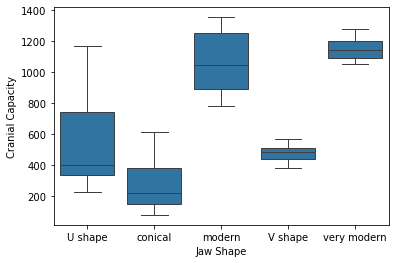

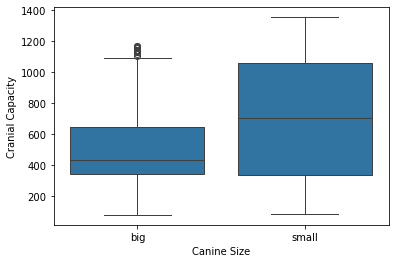

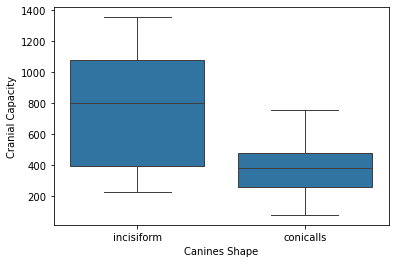

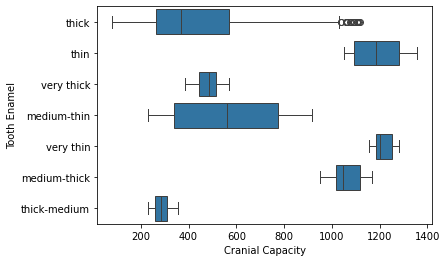

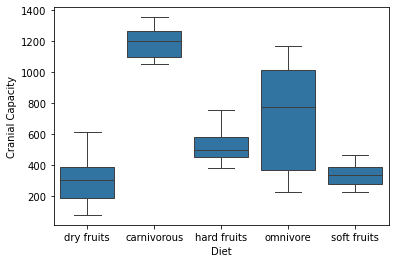

In [55]:
#make graphs for each variable
sns.boxplot(y = 'Cranial_Capacity', x = 'Incisor_Size', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Incisor Size')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Jaw_Shape', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Jaw Shape')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Canine Size', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Canine Size')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Canines_Shape', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Canines Shape')
plt.show()
plt.close()

sns.boxplot(x = 'Cranial_Capacity', y = 'Tooth_Enamel', data = hominid) 
plt.xlabel('Cranial Capacity')
plt.ylabel('Tooth Enamel')
plt.show()
plt.close()

sns.boxplot(y = 'Cranial_Capacity', x = 'Diet', data = hominid) 
plt.ylabel('Cranial Capacity')
plt.xlabel('Diet')
plt.show()
plt.close()


On first examination, yes, several traits related to diet seem to have a correlation with Cranial capacity. Some of the traits associated with larger cranial volumes are
-very-small and medium-large incisors
-modern or very modern jaw-shape
-thin, very thin, or medium thick tooth enamel
-carnivorous diet
